In [ ]:
# Notebook imports and packages
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

import sys
sys.path.insert(0,"/content/drive/MyDrive/Stuff/Online Courses/Udemy/DS&ML Course/Section_04/Example_01-03_(01-04)/")
from gd_fun import gradient_descent # Implemented in Example 02

# Understanding Learning Rates

$$h(x)=x^5-2x^4+2$$
$$\mathfrak{d}h(x)=5x^4-8x^3$$

In [ ]:
x_2 = np.linspace(-2, 2, 1001)

def g(x):
    return x**4-4*x**2+5

def dg(x):
    return 4*x**3-8*x

## Too high learning rate may never converge or even cause values to diverge.

Local minimum:	-1.8125678126498816
Number Steps:	500
Slope at x:	-9.31951371312783


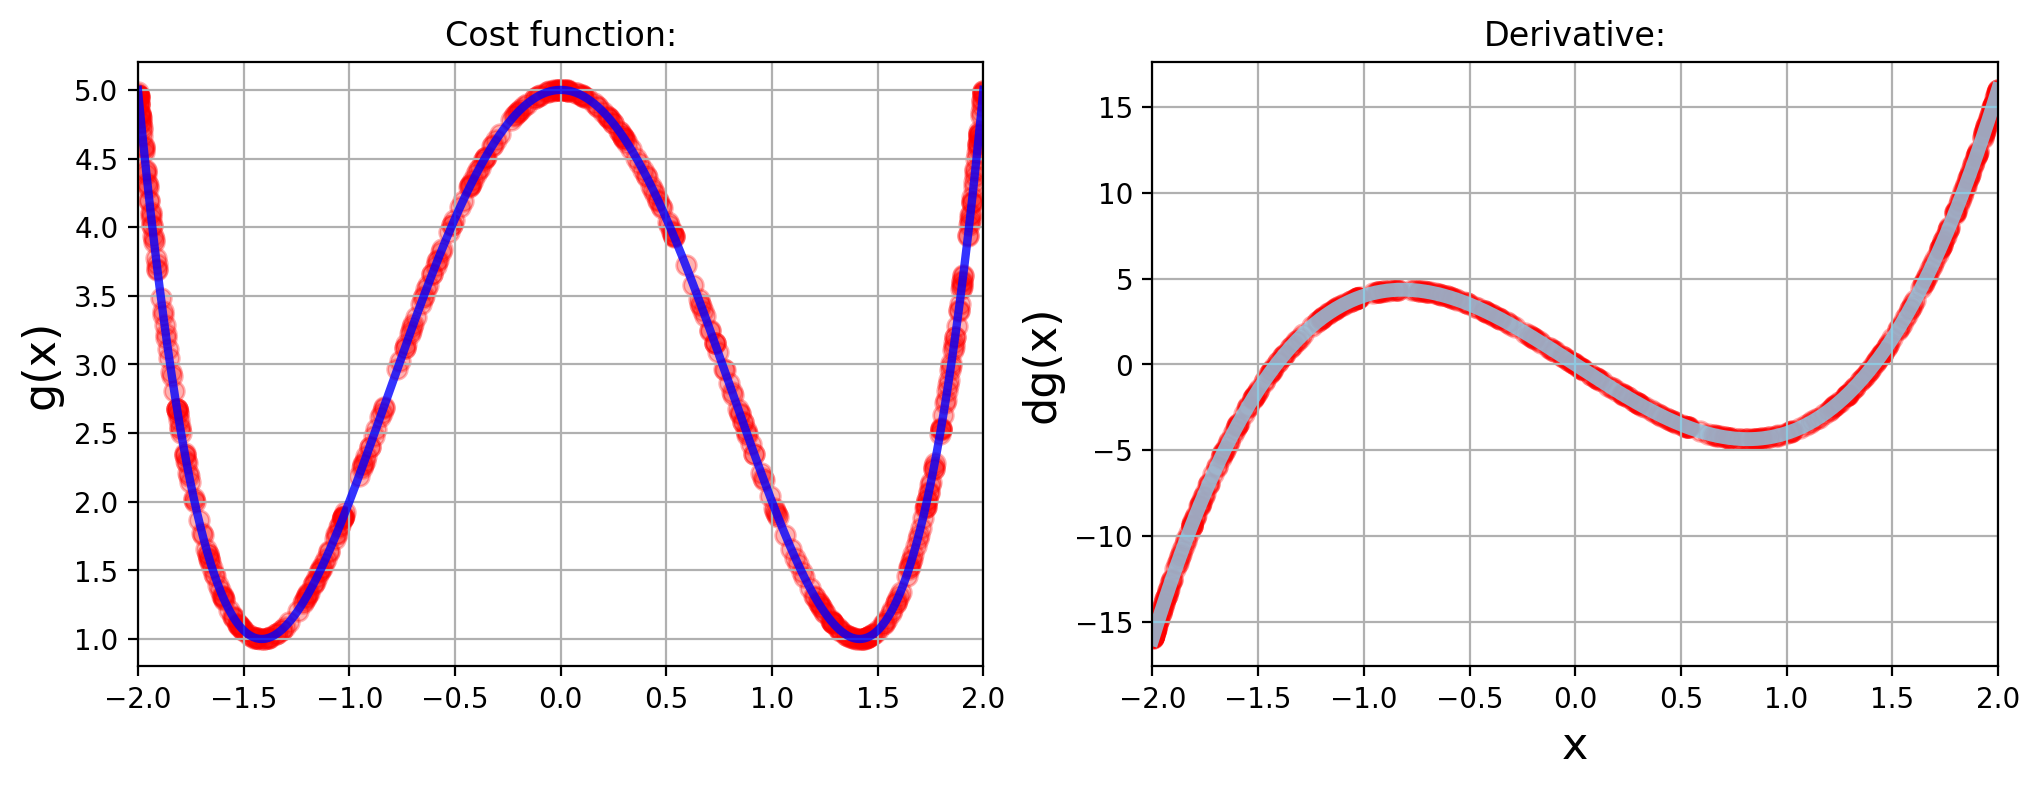

In [ ]:
local_min, x_list, deriv_list = gradient_descent(dg, .2, multiplier=.25, max_iter=500)

fig, axs = plt.subplots(1, 2, figsize=(12,4), dpi=200)

# Cost function chart:

axs[0].plot(x_2, g(x_2), color="blue", linewidth=3, alpha=.8)
axs[0].set_title("Cost function:")
axs[0].set_xlim([-2, 2])
# axs[0, 0].set_ylim(0,13)
axs[0].grid()
axs[0].set_ylabel("g(x)", fontsize=16)
axs[0].scatter(x_list, g(x_list), color='red', s=50, alpha=.3)

# Derivative chart:
axs[1].set_title("Derivative:")
axs[1].plot(x_2, dg(x_2), color='skyblue', linewidth=5, alpha=.8)
axs[1].set_xlabel("x", fontsize=16)
axs[1].set_ylabel("dg(x)", fontsize=16)
axs[1].set_xlim([-2, 2])
axs[1].grid()
axs[1].scatter(x_list, deriv_list, color='red', s=50, alpha=.3)

plt.show()

## Too low learning rate may take an eternity to converge.

In [ ]:
from os import pread
n=100
iter_list = list(range(1,n+1))

_, low_gamma, _ = gradient_descent(dg, 2.2, multiplier=.0001, max_iter=n)
_, mid_gamma, _ = gradient_descent(dg, 2.2, multiplier=.0005, max_iter=n)
_, high_gamma, _ = gradient_descent(dg, 2.2, multiplier=.002, max_iter=n)
_, bad_gamma, _ = gradient_descent(dg, 1.9, multiplier=.25, precision=0.0000001, max_iter=n)

Local minimum:	2.0012839621923093
Number Steps:	100
Slope at x:	16.051398061572993
Local minimum:	1.6484539016510755
Number Steps:	100
Slope at x:	4.730405069266805
Local minimum:	1.4307264976655605
Number Steps:	100
Slope at x:	0.26885245815335423
Local minimum:	-0.8956003854473498
Number Steps:	100
Slope at x:	4.29135862630833


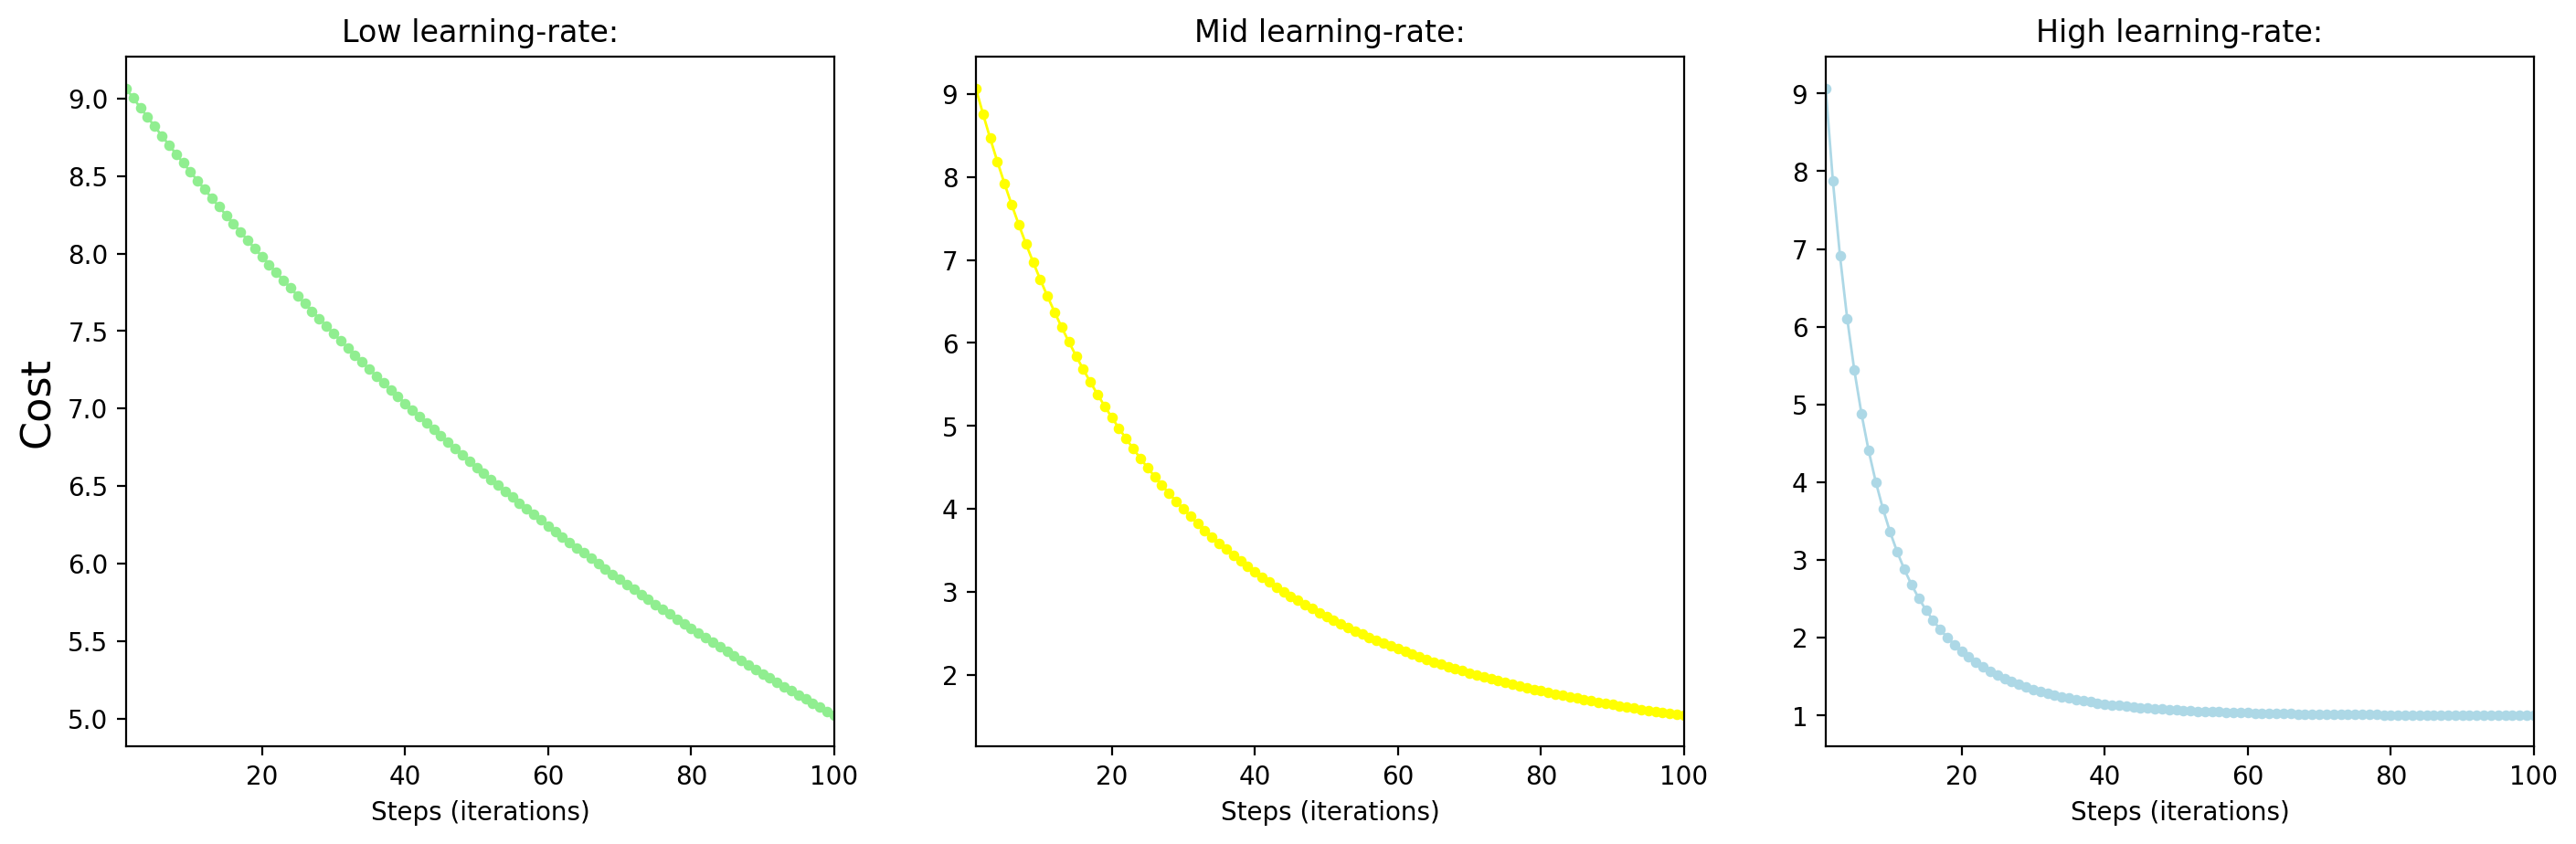

In [ ]:
fig, axs = plt.subplots(1, 3, figsize=(17,5), dpi=200)

# Low
axs[0].set_title("Low learning-rate:")
axs[0].set_xlim([1, n])
axs[0].set_xlabel("Steps (iterations)", fontsize=10)
axs[0].set_ylabel("Cost", fontsize=16)

axs[0].plot(iter_list, g(low_gamma), color="lightgreen", linewidth=1)
axs[0].scatter(iter_list, g(low_gamma), color='lightgreen', s=10)

# Mid
axs[1].set_title("Mid learning-rate:")
axs[1].set_xlim([1, n])
axs[1].set_xlabel("Steps (iterations)", fontsize=10)

axs[1].plot(iter_list, g(mid_gamma), color="yellow", linewidth=1)
axs[1].scatter(iter_list, g(mid_gamma), color='yellow', s=10)

# High
axs[2].set_title("High learning-rate:")
axs[2].set_xlim([1, n])
axs[2].set_xlabel("Steps (iterations)", fontsize=10)

axs[2].plot(iter_list, g(high_gamma), color="lightblue", linewidth=1)
axs[2].scatter(iter_list, g(high_gamma), color='lightblue', s=10)

plt.show()

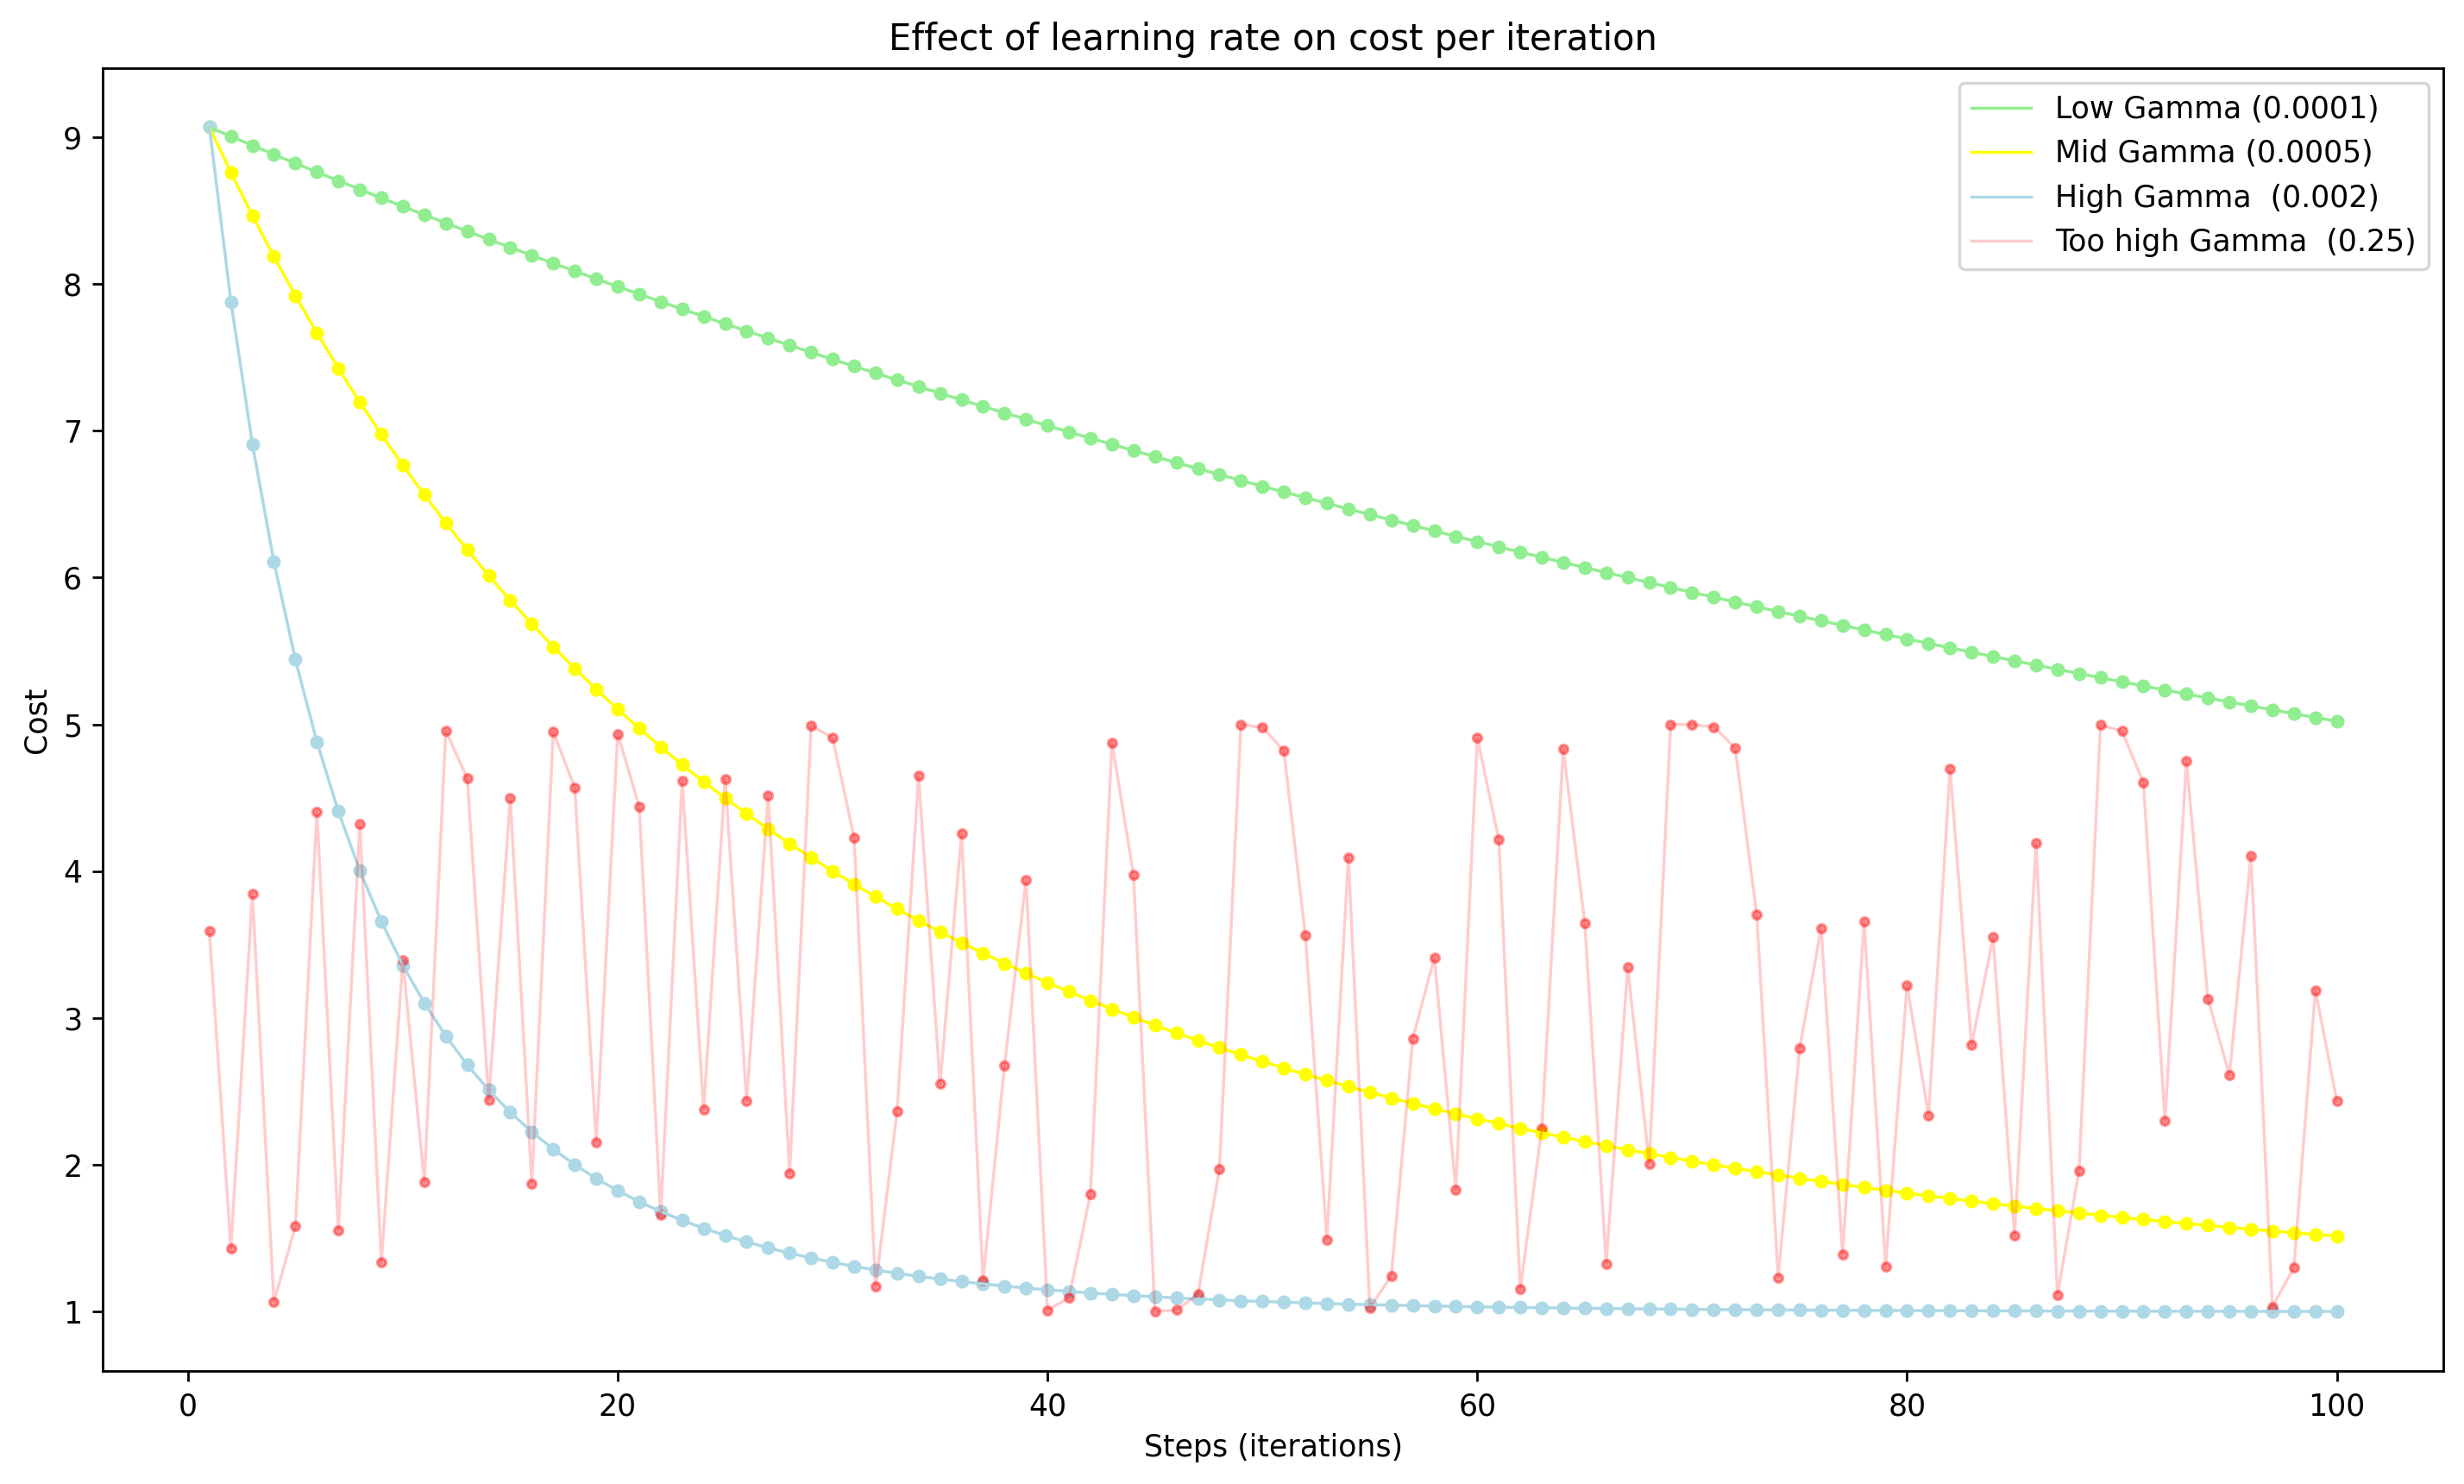

In [ ]:
plt.figure(figsize=(14, 8), dpi=250)

plt.title("Effect of learning rate on cost per iteration")
plt.xlabel("Steps (iterations)")
plt.ylabel("Cost")
plt.plot(iter_list, g(low_gamma), color="lightgreen", linewidth=1, label="Low Gamma (0.0001)")
plt.scatter(iter_list, g(low_gamma), color='lightgreen', s=13)
plt.plot(iter_list, g(mid_gamma), color="yellow", linewidth=1, label="Mid Gamma (0.0005)")
plt.scatter(iter_list, g(mid_gamma), color='yellow', s=13)
plt.plot(iter_list, g(high_gamma), color="lightblue", linewidth=1, label="High Gamma  (0.002)")
plt.scatter(iter_list, g(high_gamma), color='lightblue', s=13)
plt.plot(iter_list, g(bad_gamma), color="red", linewidth=1, alpha=.2, label="Too high Gamma  (0.25)")
plt.scatter(iter_list, g(bad_gamma), color='red', s=8, alpha=.4)
plt.legend()
plt.show()